In [1]:
import numpy as np
import pandas as pd

## Rotten Tomato dataset 

In [4]:
rt_reviews= pd.read_csv("/Users/Lenovo1/Desktop/Machine learning/project /data/rotten tomato/rotten_tomatoes_movie_reviews.csv")
rt_reviews.head()

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...


In [23]:
len(rt_reviews)/len(rt_reviews["id"].unique())

20.861975369244764

In [20]:
missing_ratio = rt_reviews.isnull().mean().round(4) * 100
missing_ratio

id                 0.00
reviewId           0.00
creationDate       0.00
criticName         0.00
isTopCritic        0.00
originalScore     30.12
reviewState        0.00
publicatioName     0.00
reviewText         4.79
scoreSentiment     0.00
reviewUrl         14.60
dtype: float64

In [7]:
rt_movies= pd.read_csv("data/rotten tomato/rotten_tomatoes_movies.csv")
rt_movies.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN


In [30]:

missing_ratio = rt_movies.isnull().mean().round(4) * 100
missing_ratio


id                       0.00
title                    0.26
audienceScore           48.87
tomatoMeter             76.35
rating                  90.23
ratingContents          90.23
releaseDateTheaters     78.52
releaseDateStreaming    44.56
runtimeMinutes           9.65
genre                    7.74
originalLanguage         9.67
director                 2.94
writer                  37.10
boxOffice               89.71
distributor             83.94
soundMix                88.89
dtype: float64

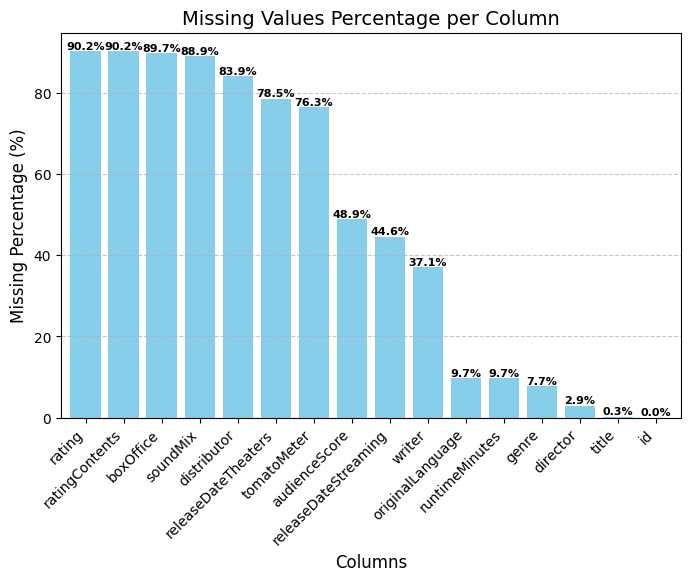

In [32]:
import matplotlib.pyplot as plt

# 确保 missing_ratio_sorted 变量已定义
missing_ratio_sorted = missing_ratio.sort_values(ascending=False)

# 创建柱状图
plt.figure(figsize=(8, 5))
bars = missing_ratio_sorted.plot(kind="bar", legend=False, width=0.8, color='skyblue')

# 在柱子上方添加百分比标签
for bar, percentage in zip(bars.patches, missing_ratio_sorted):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, 
             f"{percentage:.1f}%", ha='center', fontsize=8, fontweight='bold')

# 添加标题和标签
plt.title("Missing Values Percentage per Column", fontsize=14)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Missing Percentage (%)", fontsize=12)
plt.xticks(rotation=45, ha="right")

# 显示网格线
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 显示图表
plt.show()


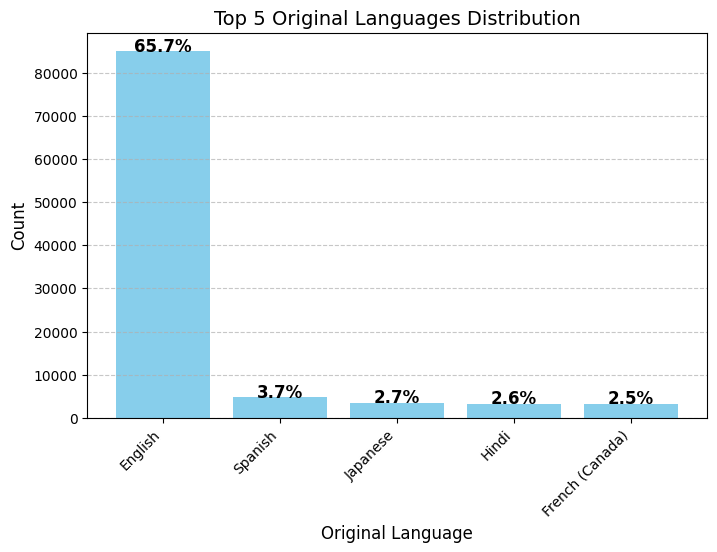

In [28]:
language = rt_movies['originalLanguage'].dropna()
language_counts = rt_movies['originalLanguage'].value_counts()
# 确保 language_counts 已经被定义并包含前 5 个最多的语言
top5_language_counts = language_counts.head(5)

# 计算百分比
total_count = language_counts.sum()
percentages = (top5_language_counts / total_count) * 100
plt.figure(figsize=(8, 5))
bars = top5_language_counts.plot(kind='bar', width=0.8, color='skyblue')
for bar, percentage in zip(bars.patches, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, 
             f"{percentage:.1f}%", ha='center', fontsize=12, fontweight='bold')
plt.title("Top 5 Original Languages Distribution", fontsize=14)
plt.xlabel("Original Language", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


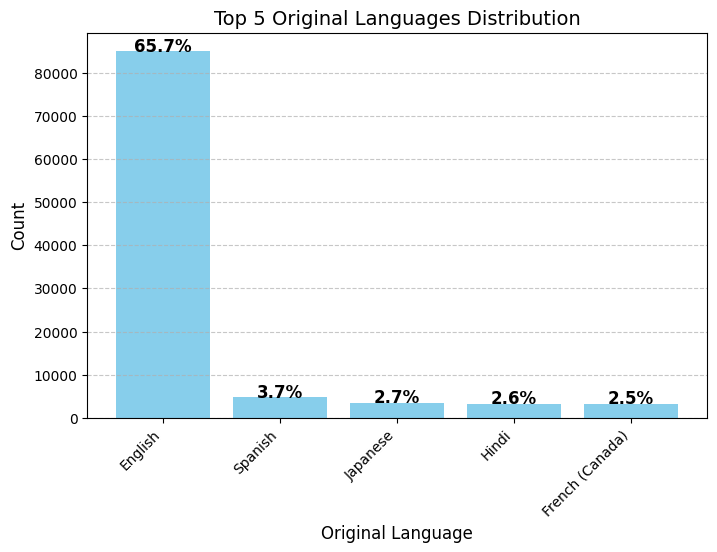

In [33]:
box_office = rt_movies['boxOffice'].dropna()
bo= box_office['originalLanguage'].value_counts()
# 确保 language_counts 已经被定义并包含前 5 个最多的语言
top5_language_counts = language_counts.head(5)

# 计算百分比
total_count = language_counts.sum()
percentages = (top5_language_counts / total_count) * 100
plt.figure(figsize=(8, 5))
bars = top5_language_counts.plot(kind='bar', width=0.8, color='skyblue')
for bar, percentage in zip(bars.patches, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, 
             f"{percentage:.1f}%", ha='center', fontsize=12, fontweight='bold')
plt.title("Top 5 Original Languages Distribution", fontsize=14)
plt.xlabel("Original Language", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

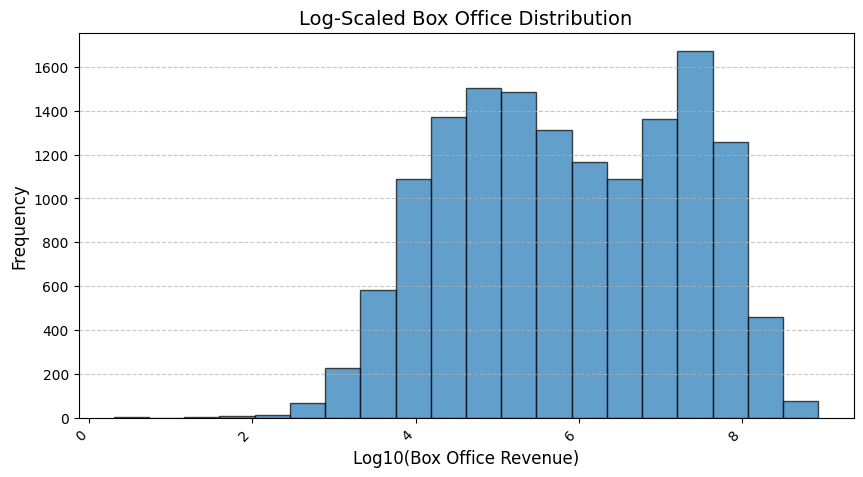

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 过滤掉 NaN 值
box_office = rt_movies['boxOffice'].dropna()
# 定义转换函数
def convert_box_office(value):
    value = value.replace("$", "")  # 去掉美元符号
    if "M" in value:
        return float(value.replace("M", "")) * 1e6  # 百万
    elif "K" in value:
        return float(value.replace("K", "")) * 1e3  # 千
    else:
        return float(value)  # 没有单位的情况（直接转换）

# 应用转换
box_office = box_office.apply(convert_box_office)

# 进行对数变换（防止数据跨度太大影响可视化）
box_office_log = np.log10(box_office[box_office > 0])  # 避免 log(0) 问题

# 绘制对数变换的直方图
plt.figure(figsize=(10, 5))
plt.hist(box_office_log, bins=20, edgecolor="black", alpha=0.7)

# 添加标题和标签
plt.title("Log-Scaled Box Office Distribution", fontsize=14)
plt.xlabel("Log10(Box Office Revenue)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha="right")

# 显示网格线
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 显示图表
plt.show()


In [44]:
genre = rt_movies['genre'].dropna()
genre

0                Comedy, Horror, Sci-fi
1                                 Drama
2                                 Drama
3            Action, Mystery & thriller
4         Fantasy, Adventure, Animation
                      ...              
143253         Action, Adventure, Anime
143254                            Drama
143255                      Documentary
143256                            Drama
143257                           Horror
Name: genre, Length: 132175, dtype: object

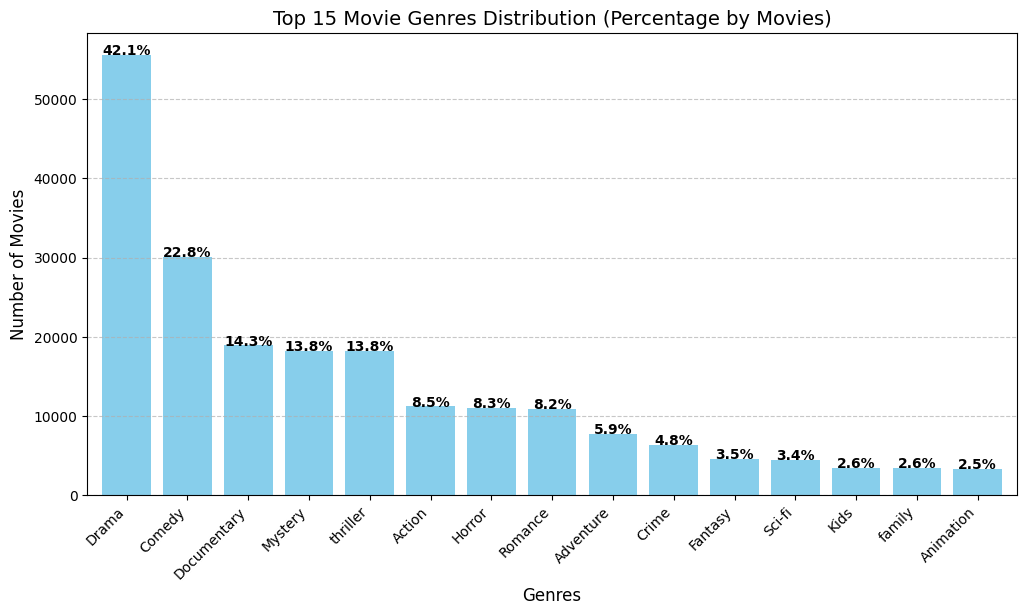

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 rt_movies 数据已加载
genres_raw = rt_movies['genre'].dropna()

# 统一分隔符（可能是 "," 或 "&"），并拆分成列表
genres_split = genres_raw.str.replace(",", "&").str.split("&")

# 统计包含某个类型的电影数量（去重处理，每部电影类型不重复计算）
all_genres = {}
total_movies = len(genres_split)  # 电影总数

for genre_list in genres_split:
    unique_genres = set(genre_list)  # 去重，确保每部电影的某个类型只计数一次
    for genre in unique_genres:
        genre = genre.strip()  # 去除空格
        all_genres[genre] = all_genres.get(genre, 0) + 1
genre_counts = pd.Series(all_genres).sort_values(ascending=False)
percentages = (genre_counts / total_movies) * 100
top_n = 15
plt.figure(figsize=(12, 6))
bars = genre_counts.head(top_n).plot(kind='bar', color='skyblue', width=0.8)

# 在柱子上方添加百分比标签
for bar, percentage in zip(bars.patches, percentages.head(top_n)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, 
             f"{percentage:.1f}%", ha='center', fontsize=10, fontweight='bold')

# 添加标题和标签
plt.title("Top 15 Movie Genres Distribution (Percentage by Movies)", fontsize=14)
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.xticks(rotation=45, ha="right")

# 显示网格线
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 显示图表
plt.show()


In [53]:
import pandas as pd
filtered_df = rt_movies[rt_movies['boxOffice'].notna()]
missing_ratio = filtered_df.isnull().mean() * 100
missing_ratio

id                       0.000000
title                    0.013566
audienceScore            4.402089
tomatoMeter             10.330326
rating                  54.303737
ratingContents          54.303737
releaseDateTheaters     19.209116
releaseDateStreaming     7.773180
runtimeMinutes           0.284881
genre                    0.000000
originalLanguage         0.142440
director                 0.176355
writer                  16.143254
boxOffice                0.000000
distributor             25.340840
soundMix                50.634199
dtype: float64

## Wiki Dataset

In [55]:
wiki = pd.read_csv("data/wiki_movie_plots_deduped 2.csv")
wiki.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [56]:
wiki.shape

(34886, 8)

In [57]:
missing_ratio = wiki.isnull().mean().round(4) * 100
missing_ratio

Release Year        0.00
Title               0.00
Origin/Ethnicity    0.00
Director            0.00
Cast                4.08
Genre               0.00
Wiki Page           0.00
Plot                0.00
dtype: float64

## Movie Dataset

In [58]:
credits = pd.read_csv("/Users/Lenovo1/Desktop/Machine learning/project /data/Movie dataset/credits.csv")
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [75]:
import pandas as pd
import ast  # 用于安全解析嵌套列表/字典格式

# 读取 CSV
credits = pd.read_csv("/Users/Lenovo1/Desktop/Machine learning/project /data/Movie dataset/credits.csv")

# 解析 JSON 格式的列（cast 和 cre



In [62]:
credits.head()

,cast,crew,id,first_actor
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,Tom Hanks
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Robin Williams
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Walter Matthau
3,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Whitney Houston
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Steve Martin
...,...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050,Leila Hatami
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109,Angel Aquino
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758,Erika Eleniak
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506,Iwan Mosschuchin


In [76]:
keywords = pd.read_csv("/Users/Lenovo1/Desktop/Machine learning/project /data/Movie dataset/keywords.csv")
keywords["keywords"] = keywords["keywords"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else [])
keywords["keywords"] = keywords["keywords"].apply(lambda x: [kw["name"] for kw in x])
keywords.head()

,id,keywords
0,862,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[board game, disappearance, based on children'..."
2,15602,"[fishing, best friend, duringcreditsstinger, o..."
3,31357,"[based on novel, interracial relationship, sin..."
4,11862,"[baby, midlife crisis, confidence, aging, daug..."


In [65]:
links_small = pd.read_csv("/Users/Lenovo1/Desktop/Machine learning/project /data/Movie dataset/links_small.csv")
links_small.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [66]:
links = pd.read_csv("/Users/Lenovo1/Desktop/Machine learning/project /data/Movie dataset/links.csv")
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [80]:
movies_metadata = pd.read_csv("/Users/Lenovo1/Desktop/Machine learning/project /data/Movie dataset/movies_metadata.csv")
def extract_names(column):
    if pd.isna(column) or column == "nan":  # 处理缺失值
        return []
    try:
        parsed = ast.literal_eval(column) if isinstance(column, str) and column.startswith("[") else [ast.literal_eval(column)]
        return [entry["name"] for entry in parsed if isinstance(entry, dict) and "name" in entry]
    except (ValueError, SyntaxError):  # 处理异常数据
        return []

movies_metadata["belongs_to_collection"] = movies_metadata["belongs_to_collection"].apply(extract_names)

# 解析 genres
movies_metadata["genres"] = movies_metadata["genres"].apply(extract_names)
movies_metadata["spoken_languages"] = movies_metadata["spoken_languages"].apply(extract_names)

movies_metadata.head(3)


/var/folders/6w/218h06nd01b7jrt1y56dhm6w0000gq/T/ipykernel_58358/3599641145.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv("/Users/Lenovo1/Desktop/Machine learning/project /data/Movie dataset/movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,[Toy Story Collection],30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0
1,False,[],65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,[Grumpy Old Men Collection],0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [71]:
ratings = pd.read_csv("/Users/Lenovo1/Desktop/Machine learning/project /data/Movie dataset/ratings.csv")
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
